In [67]:
import pandas as pd

import importlib

import file_loader
importlib.reload(file_loader)

from file_loader import FileLoader

# Percorso del file CSV (usa path relativo)
csv_path = "../data/input/determinazioni_amianto_2024.csv"
# Leggi il CSV con pandas
try:
    # encoding='latin1'  → Vecchi file Windows/Europa occidentale
    # encoding='cp1252'  → Variante Windows, gestisce più simboli (€ ecc.)
    # encoding='utf-8-sig' → Da usare se la prima colonna ha caratteri strani (BOM UTF-8), tipico da Excel
    # Provare diversi encoding se si vedono caratteri strani nei dati/colonne!
    loader = FileLoader(csv_path,';','utf-8-sig')
    df = loader.load()
    print("Dati caricati correttamente:")
    print(df.head())
    print("Record iniziali:", len(df))
except Exception as e:
    print(f"Errore nel caricamento: {e}")
    raise



Dati caricati correttamente:
   codice_record  id_punto_campionamento  \
0            265                     200   
1            282                     201   
2            283                     202   
3            408                     203   
4            409                     204   

                                          nome_punto               Comune  \
0  punto1 - cono di deiezione nei pressi del matt...  SAN SEVERINO LUCANO   
1  punto 2 - piazzola di sosta sottostante un pic...  SAN SEVERINO LUCANO   
2            punto 3 - strada sterrata per 3 confini  SAN SEVERINO LUCANO   
3            loc. Rondinelle - complanare nord MT-BA               MATERA   
4            loc. Rondinelle - complanare nord MT-BA               MATERA   

   id_campionamento                               descrizione_campione  \
0               580         cono di deiezione nei pressi del mattatoio   
1               581  piazzola di sosta sottostante un piccolo front...   
2               582  

In [68]:
import importlib

import amianto_cleaner
importlib.reload(amianto_cleaner)

from amianto_cleaner import AmiantoCleaner

cleaner = AmiantoCleaner(df)
df_clean = cleaner.get_cleaned()
print(df_clean.head())
print("Record dopo cleaning:", len(df_clean))

   codice_record  id_punto_campionamento  \
0            265                     200   
1            282                     201   
2            283                     202   
3            408                     203   
4            409                     204   

                                          nome_punto               comune  \
0  punto1 - cono di deiezione nei pressi del matt...  san severino lucano   
1  punto 2 - piazzola di sosta sottostante un pic...  san severino lucano   
2            punto 3 - strada sterrata per 3 confini  san severino lucano   
3            loc. Rondinelle - complanare nord MT-BA               matera   
4            loc. Rondinelle - complanare nord MT-BA               matera   

   id_campionamento                               descrizione_campione  \
0               580         cono di deiezione nei pressi del mattatoio   
1               581  piazzola di sosta sottostante un piccolo front...   
2               582                       material

In [69]:
import sqlite3

# Crea o apre il file database
conn = sqlite3.connect("../data/db/report.db")  # crea il file se non esiste

# Salva il DataFrame in una tabella chiamata, ad esempio, "amianto"
df_clean.to_sql("amianto", conn, if_exists="replace", index=False)

result = conn.execute("SELECT COUNT(*) FROM amianto").fetchone()
print("Totale record in SQLite:", result[0])

conn.close()


Totale record in SQLite: 45


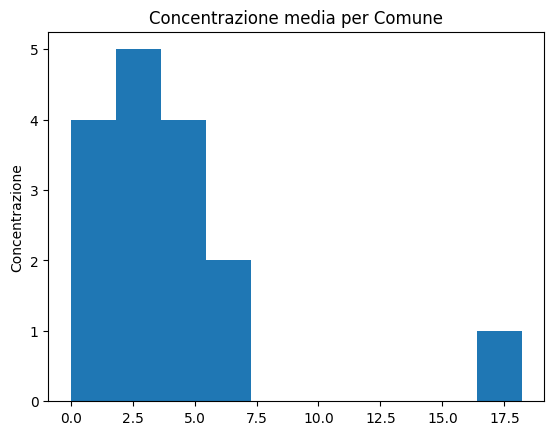

In [ ]:
import matplotlib.pyplot as plt

df_clean['concentrazione'] = pd.to_numeric(df_clean['concentrazione'], errors='coerce')
df_clean.groupby('comune')['concentrazione'].mean().plot(kind='bar')
plt.title('Concentrazione media per Comune')
plt.ylabel('Concentrazione')
plt.show()

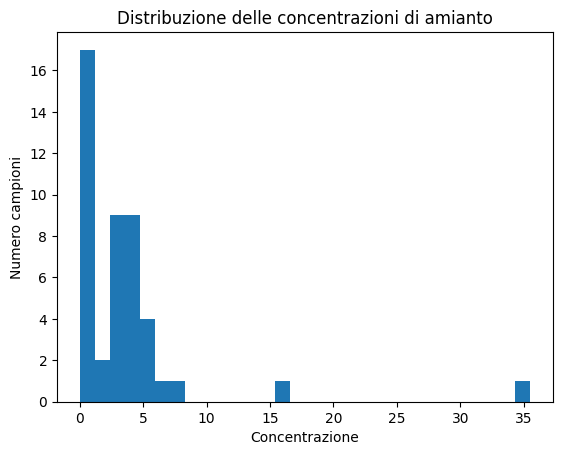

In [75]:
df_clean['concentrazione'].plot(kind='hist', bins=30)
plt.title("Distribuzione delle concentrazioni di amianto")
plt.xlabel("Concentrazione")
plt.ylabel("Numero campioni")
plt.show()